In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import warnings;
warnings.simplefilter("ignore")
sns.set()

In [15]:
rcParams["figure.figsize"] = 15, 5



data = pd.read_excel("Exc.xlsx", index_col=0)





<AxesSubplot:xlabel='Time'>

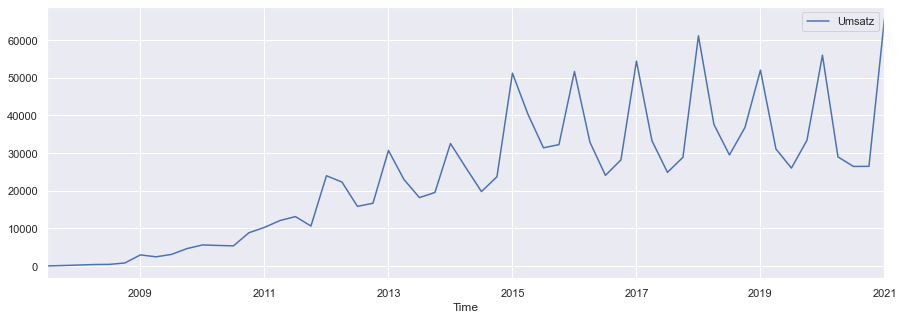

In [16]:
#Werbeumsätze von Google in den Jahren 2001 bis 2020 (in Milliarden US-Dollar)
data.plot()


In [17]:
train = data[:44]
test = data[44:]

### Convert the data


In [18]:
# Since the data has a trend - Difference and Square Root

train_diff = train.diff()[1:]
# train_diff = train_diff - train_diff.shift(4)
# train_diff = train_diff.dropna()

len(train_diff)


43

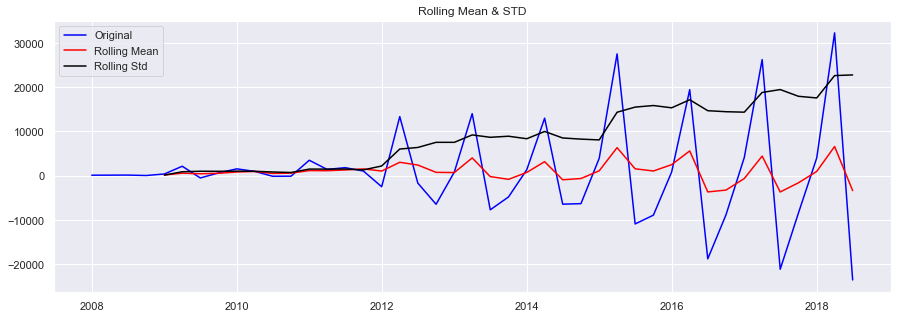

Results of Dickey-Fuller Test:
Test Statistics                -4.094573
p-value                         0.000989
#Lags Used                      6.000000
Numbers of Observation Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=5).mean()
    movingSTD = timeseries.rolling(window=5).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color="blue", label = "Original")
    mean = plt.plot(movingAverage, color="red", label = "Rolling Mean")
    std = plt.plot(movingSTD, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & STD")
    plt.show(block=False)
    
#     #Stationarity statistics:
#     plot_acf(timeseries, color="blue")
#     plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries["Umsatz"], autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistics", "p-value", "#Lags Used", "Numbers of Observation Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)" %key] = value
    print(dfoutput)
    
    

test_stationarity(train_diff)

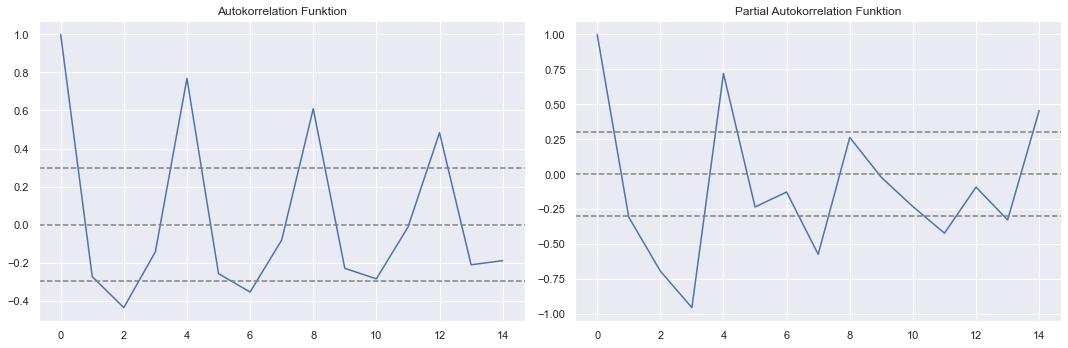

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_diff, nlags=19)
lag_pacf = pacf(train_diff, nlags = 19, method="ols")

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf[:15])
plt.axhline(y=0, linestyle = "--", color="gray")
plt.axhline(y = -1.96/np.sqrt(len(train_diff)), linestyle="--", color="gray")
plt.axhline(y = 1.96/np.sqrt(len(train_diff)), linestyle="--", color="gray")
plt.title("Autokorrelation Funktion")

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf[:15])
plt.axhline(y= 0, linestyle = "--", color="gray")
plt.axhline(y = -1.96/np.sqrt(len(train_diff)), linestyle="--", color="gray")
plt.axhline(y = 1.96/np.sqrt(len(train_diff)), linestyle="--", color="gray")
plt.title("Partial Autokorrelation Funktion")
plt.tight_layout()

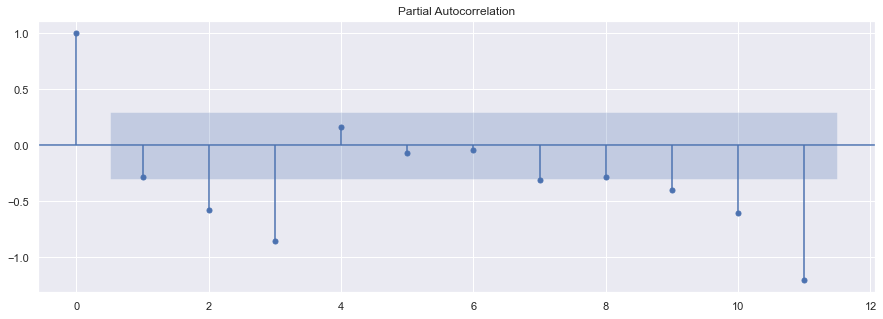

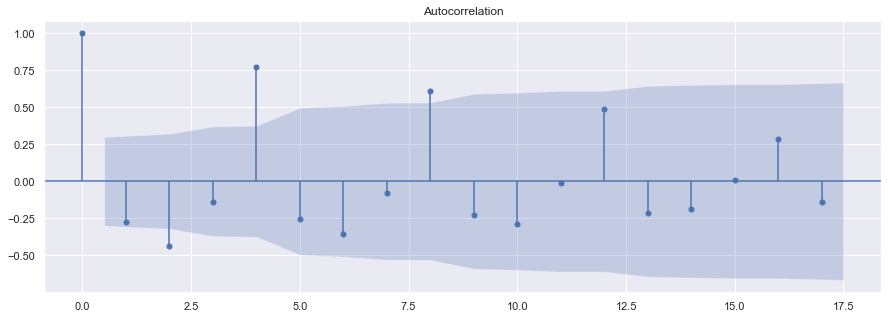

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(train_diff, lags = 11)
plt.show()
plot_acf(train_diff)
plt.show()



# Building Models

In [41]:
train = data[:44]
test = data[44:]

ARIMA(1,1,1)

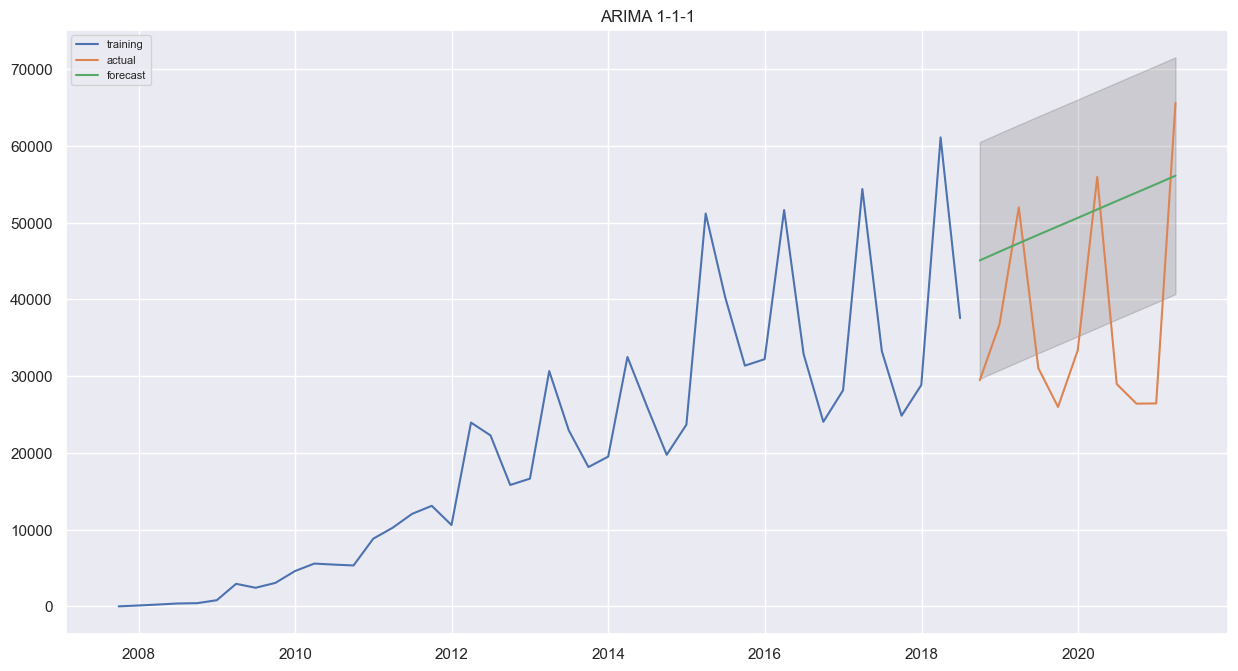

In [56]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(15,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('ARIMA 1-1-1')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [57]:
conf

array([[29653.21529216, 60511.44286452],
       [30789.86052978, 61648.60246546],
       [31889.88920336, 62748.63115628],
       [32989.7049852 , 63848.44693812],
       [34089.51953781, 64948.26149073],
       [35189.33408332, 66048.07603624],
       [36289.14862879, 67147.89058171],
       [37388.96317426, 68247.70512717],
       [38488.77771972, 69347.51967264],
       [39588.59226519, 70447.33421811],
       [40688.40681066, 71547.14876358]])

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error
print("MSE:", mean_squared_error(test.values, fc_series),
     "MAPE:", mean_absolute_percentage_error(test.values,fc_series),
      "MAE:", mae(test.values, fc_series),
      "RMSE:", np.sqrt(mean_squared_error(test.values, fc_series)))

MSE: 341633919.1258495 MAPE: 0.5476938561969037 MAE: 16504.101875275977 RMSE: 18483.341665560627


ARIMA (2,2,2)

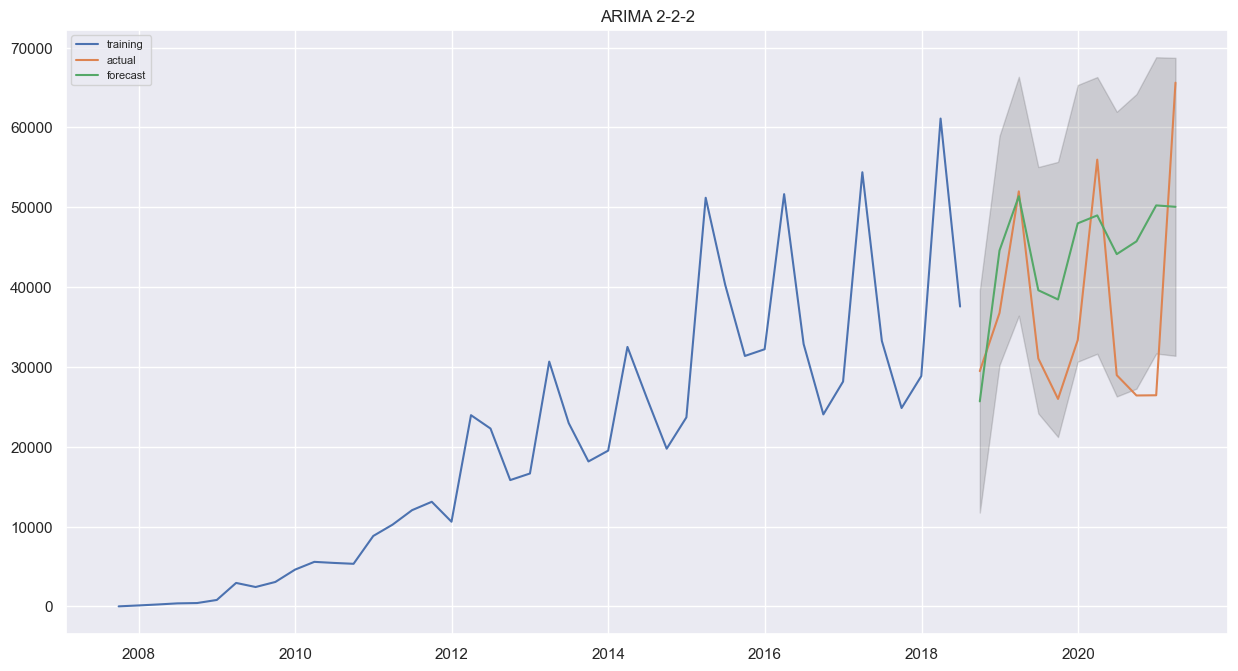

In [61]:
model = ARIMA(train, order=(2, 2, 2))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_grid = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(15,8), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series_grid, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('ARIMA 2-2-2')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Rolling ARIMA

In [319]:
my_order = (2, 1, 1)
from sklearn.metrics import mean_squared_error
X = data.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


history = [x for x in train]
predictions = list()
confidence = list()
for t in range(len(test)):
    model = ARIMA(history, order = my_order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    conf = output[1]
    confidence.append(conf)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=26561.274791, expected=29470.000000
predicted=45666.297082, expected=36755.000000
predicted=47950.255740, expected=51982.000000
predicted=45215.123384, expected=31051.000000
predicted=34829.792139, expected=25986.000000
predicted=46511.006949, expected=33362.000000
predicted=43746.737671, expected=55957.000000
predicted=43956.398676, expected=28962.000000
predicted=28262.990875, expected=26418.000000
predicted=46704.839600, expected=26444.000000
predicted=39916.535551, expected=65597.000000


In [295]:
predictions = pd.Series(predictions, index=data.index[44:])
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

Text(0.5, 0, 'Zeit')

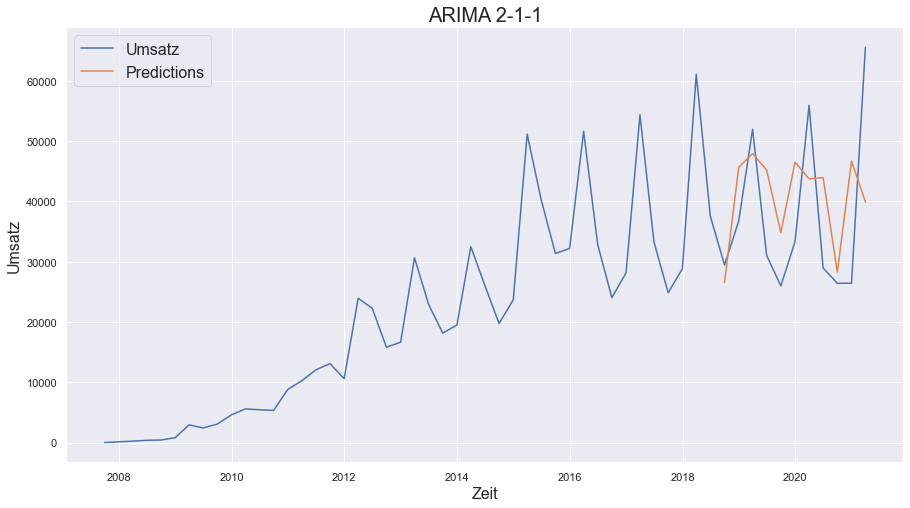

In [296]:
plt.figure(figsize=(15,8))

plt.plot(data)
plt.plot(predictions)

plt.legend(('Umsatz', 'Predictions'), fontsize=16)
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('ARIMA 2-1-1', fontsize=20)
plt.ylabel('Umsatz', fontsize=16)
plt.xlabel("Zeit", fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-03-31'), color='k', linestyle='--', alpha=0.2)

In [297]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error
print("MSE:", mean_squared_error(data.values[44:], predictions),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], predictions),
      "MAE:", mae(data.values[44:], predictions),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], predictions)))

MSE: 182106605.3567027 MAPE: 0.3247973167853076 MAE: 11545.422268345852 RMSE: 13494.68804221508


Rolling ARIMA (1,1,1)

In [73]:
my_order = (1,1,1)
from sklearn.metrics import mean_squared_error
X = data.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


history = [x for x in train]
predictions = list()
confidence = list()
for t in range(len(test)):
    model = ARIMA(history, order = my_order )
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    conf = output[1]
    confidence.append(conf)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=45082.329078, expected=29470.000000
predicted=44314.002762, expected=36755.000000
predicted=44548.655554, expected=51982.000000
predicted=46950.364237, expected=31051.000000
predicted=46288.551654, expected=25986.000000
predicted=43658.587387, expected=33362.000000
predicted=43756.251033, expected=55957.000000
predicted=48629.072550, expected=28962.000000
predicted=45736.238790, expected=26418.000000


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=39889.663140, expected=26444.000000
predicted=37006.617291, expected=65597.000000


In [74]:
predictions_1 = pd.Series(predictions, index=data.index[44:])
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

Text(0.5, 0, 'Zeit')

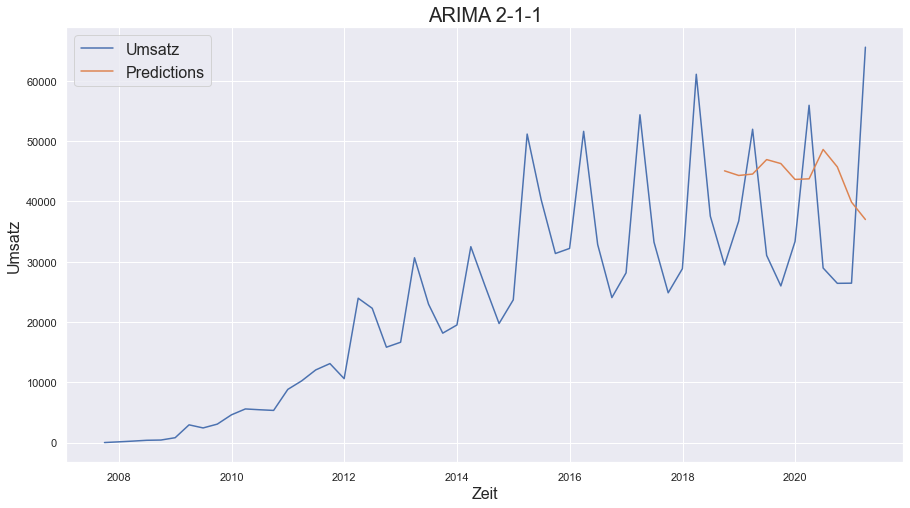

In [69]:
plt.figure(figsize=(15,8))

plt.plot(data)
plt.plot(predictions_1)

plt.legend(('Umsatz', 'Predictions'), fontsize=16)
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('ARIMA 2-1-1', fontsize=20)
plt.ylabel('Umsatz', fontsize=16)
plt.xlabel("Zeit", fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-03-31'), color='k', linestyle='--', alpha=0.2)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error
print("MSE:", mean_squared_error(data.values[44:], predictions_1),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], predictions_1),
      "MAE:", mae(data.values[44:], predictions_1),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], predictions_1)))

MSE: 275834841.7269032 MAPE: 0.4593682650343283 MAE: 15484.1168836668 RMSE: 16608.276302100203


### Finding AIC 

In [22]:
X = data.values
train = X[:44] # 15 data as train data
test = X[44:]  # 5 data as test data
predictions = []


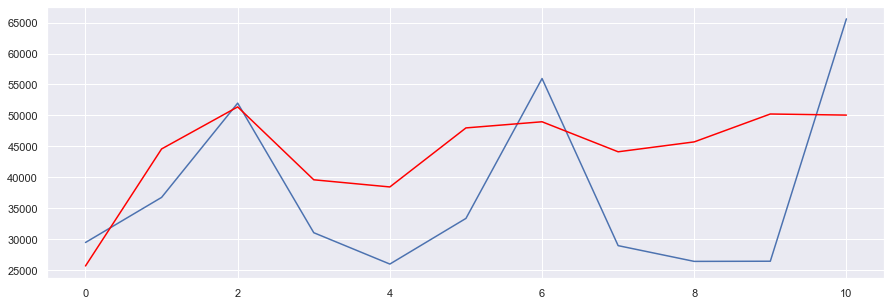

In [323]:
model_arima = ARIMA(train,order=(2, 2, 2))
model_arima_fit = model_arima.fit()

predictions= model_arima_fit.forecast(steps=11)[0]

plt.plot(test)
plt.plot(predictions,color='red')

In [24]:
forecast_accuracy(predictions, test)

{'mape': 0.369225237684314,
 'me': 6797.232437658719,
 'mae': 11693.52171043608,
 'mpe': 0.3047859342495652,
 'rmse': 16462.133787735445}

In [25]:
#another method
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 980.6750769156895
(0, 0, 1) 960.5971812054543


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(0, 0, 2) 940.0482490178995
(0, 0, 3) 958.7705474898112
(0, 0, 4) 934.6696794838817
(0, 1, 0) 927.6362750737874
(0, 1, 1) 903.3163646248729
(0, 1, 2) 905.3086417698239
(0, 1, 3) 903.6507065060191


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(0, 2, 0) 944.4843386992803
(0, 2, 1) 912.9010833597206
(0, 2, 2) 894.8649740309548
(0, 2, 3) 895.9361456570226
(1, 0, 0) 946.7924978736041


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(1, 0, 1) 943.3603629912577


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 2) 1132.003196068454


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 3) 987.613522365999
(1, 0, 4) 918.9611445092776
(1, 1, 0) 925.9477065608947
(1, 1, 1) 905.3149610917555


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2) 908.4255687540817


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(1, 1, 3) 896.3243824606166
(1, 2, 0) 939.3130482182188
(1, 2, 1) 911.8003304611383
(1, 2, 3) 897.31520850412
(2, 0, 0) 947.8951648133811


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 1) 960.1600007945017


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2) 945.9924510281485


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(2, 0, 4) 920.0621928628073
(2, 1, 0) 909.8256248293378
(2, 1, 1) 896.1231883398275


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(2, 1, 4) 901.059439354821
(2, 2, 0) 931.0705314778289
(2, 2, 1) 897.0147292847219


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(2, 2, 2) 885.108682802041


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(2, 2, 4) 900.9584660630109
(3, 0, 0) 935.5595894222527


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(3, 0, 1) 931.7437804353785


C:\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(3, 0, 3) 940.8416300639249


Plot

Text(0.5, 1.0, 'ARIMA Vergleich')

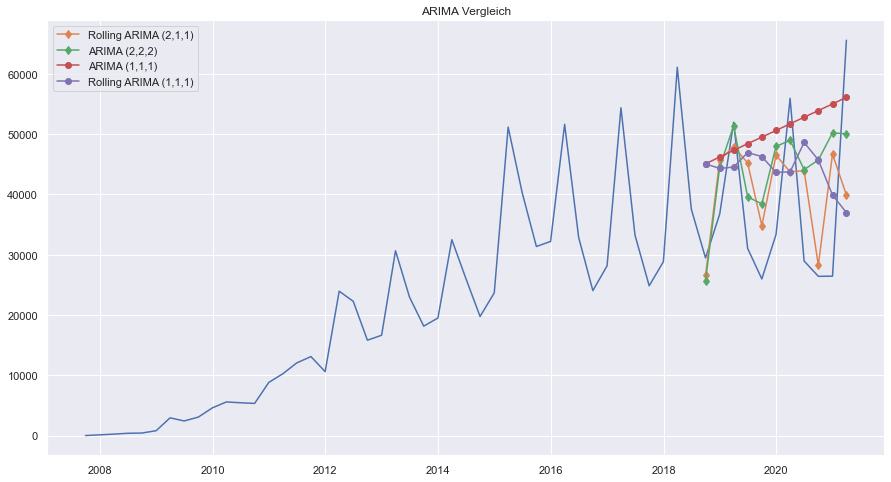

In [85]:
plt.figure(figsize=(15, 8))
plt.plot(data)
plt.plot(predictions, label = "Rolling ARIMA (2,1,1)", marker = "d")
plt.plot(fc_series_grid, label = "ARIMA (2,2,2)", marker = "d")
plt.plot(fc_series, label = "ARIMA (1,1,1)", marker = "o")
plt.plot(predictions_1, label = "Rolling ARIMA (1,1,1)", marker = "o")



plt.legend(loc = "upper left")
plt.title('ARIMA Vergleich')